<a href="https://colab.research.google.com/github/Noveek/Project-medium/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files

uploaded = files.upload()

Saving medium_data.csv to medium_data.csv


In [4]:
md = pd.read_csv('medium_data.csv')
md.head(2)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30


In [5]:
md.columns

Index(['id', 'url', 'title', 'subtitle', 'image', 'claps', 'responses',
       'reading_time', 'publication', 'date'],
      dtype='object')

In [6]:
md.dtypes

id               int64
url             object
title           object
subtitle        object
image           object
claps            int64
responses       object
reading_time     int64
publication     object
date            object
dtype: object

In [7]:
md.describe(include=object).T.style.background_gradient(subset=["count"], cmap="Purples")

,count,unique,top,freq
url,6508,6508,https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92,1
title,6508,6504,Lost in translation,2
subtitle,3479,3470,"A weekly selection of design links, brought to you by your friends at the UX Collective.",5
image,6361,6361,1.png,1
responses,6508,56,0,3396
publication,6508,7,The Startup,3041
date,6508,50,2019-10-21,197


In [8]:
md.describe(include='all').T.style.background_gradient(subset=["count"], cmap="Purples")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6508.000000,nan,nan,nan,3254.500000,1878.842108,1.000000,1627.750000,3254.500000,4881.250000,6508.000000
url,6508,6508,https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92,1,nan,nan,nan,nan,nan,nan,nan
title,6508,6504,Lost in translation,2,nan,nan,nan,nan,nan,nan,nan
subtitle,3479,3470,"A weekly selection of design links, brought to you by your friends at the UX Collective.",5,nan,nan,nan,nan,nan,nan,nan
image,6361,6361,1.png,1,nan,nan,nan,nan,nan,nan,nan
claps,6508.000000,nan,nan,nan,311.076060,950.789896,0.000000,54.000000,115.000000,268.250000,38000.000000
responses,6508,56,0,3396,nan,nan,nan,nan,nan,nan,nan
reading_time,6508.000000,nan,nan,nan,6.134911,3.231918,0.000000,4.000000,5.000000,7.000000,55.000000
publication,6508,7,The Startup,3041,nan,nan,nan,nan,nan,nan,nan
date,6508,50,2019-10-21,197,nan,nan,nan,nan,nan,nan,nan


In [9]:
md.describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,6508.000000,3254.500000,1878.842108,1.000000,1627.750000,3254.500000,4881.250000,6508.000000
claps,6508.000000,311.076060,950.789896,0.000000,54.000000,115.000000,268.250000,38000.000000
reading_time,6508.000000,6.134911,3.231918,0.000000,4.000000,5.000000,7.000000,55.000000


In [10]:
#convert date in object to datetime
md['date'] = pd.to_datetime(md['date'])
md.head().style.set_properties(subset = ['date'], **{'background-color' : 'dodgerblue'})

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92,A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model,nan,1.png,850,8,8,Towards Data Science,2019-05-30 00:00:00
1,2,https://towardsdatascience.com/hands-on-graph-neural-networks-with-pytorch-pytorch-geometric-359487e221a8,Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric,nan,2.png,1100,11,9,Towards Data Science,2019-05-30 00:00:00
2,3,https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30 00:00:00
3,4,https://towardsdatascience.com/databricks-how-to-save-files-in-csv-on-your-local-computer-3d0c70e6a9ab,Databricks: How to Save Files in CSV on Your Local Computer,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30 00:00:00
4,5,https://towardsdatascience.com/a-step-by-step-implementation-of-gradient-descent-and-backpropagation-d58bda486110,A Step-by-Step Implementation of Gradient Descent and Backpropagation,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30 00:00:00


In [11]:
md.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [12]:
print(f"There are {len(md)} rows in our data")

There are 6508 rows in our data


In [13]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6508 non-null   int64         
 1   url           6508 non-null   object        
 2   title         6508 non-null   object        
 3   subtitle      3479 non-null   object        
 4   image         6361 non-null   object        
 5   claps         6508 non-null   int64         
 6   responses     6508 non-null   object        
 7   reading_time  6508 non-null   int64         
 8   publication   6508 non-null   object        
 9   date          6508 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 508.6+ KB


In [14]:
md["responses"].unique()

array(['8', '11', '1', '0', '3', '2', '60', '27', '58', '13', '6', '15',
       '5', '4', '19', '10', '9', '7', '16', '76', '33', '21', '28', '14',
       '24', '17', '78', '30', '12', '74', '50', '18', '22', '48', '26',
       '20', '35', '51', '25', '62', '53', '120', '41', 'Read', '34',
       '86', '82', '63', '46', '170', '45', '23', '32', '29', '52', '117'],
      dtype=object)

In [15]:
md[md["responses"]=="Read"]

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,3978.jpg,73,Read,3,Data Driven Investor,2019-05-24
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,NaN,74,Read,5,UX Collective,2019-12-05


In [16]:
#Drop response that have ' REad'
md.drop(index=[3977, 6392], inplace=True)

In [17]:
md.duplicated().sum()

0

In [18]:
pubs_articles_count = md.publication.value_counts().rename_axis('publications').reset_index(name='counts')
pubs_articles_count

,publications,counts
0,The Startup,3041
1,Towards Data Science,1461
2,Data Driven Investor,777
3,UX Collective,554
4,The Writing Cooperative,403
5,Better Marketing,242
6,Better Humans,28


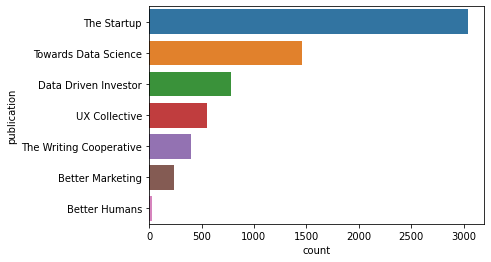

In [19]:
sns.countplot(y="publication", data=md, order=md['publication'].value_counts().index)
plt.show()

#How Reading Varies

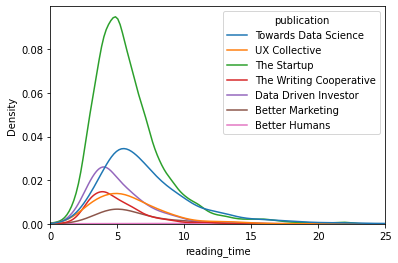

In [20]:
sns.kdeplot(x="reading_time", hue="publication", data=md)
plt.xlim(0,25)
plt.show()

In [21]:
#convert Response fromobject to integer
md["responses"] = md["responses"].astype(int)
md["responses"].dtype

dtype('int64')

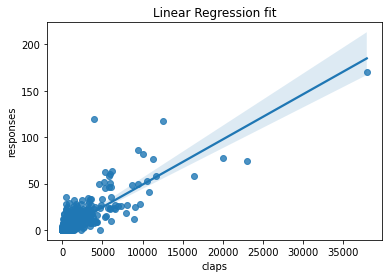

In [22]:
#plot a graph showing relationship between Clap and Response
sns.regplot(x="claps", y="responses", data=md)
plt.title("Linear Regression fit")
plt.show()

In [23]:
claps = md.groupby('publication')['claps'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(claps, x= 'publication', y='claps', color = 'publication',
       title="Claps for various Publishers" )

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [24]:
reponse = md.groupby('publication')['responses'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(reponse, x= 'publication', y='responses', color = 'publication',
       title="Responses for various Publishers" )

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [25]:
read_time = md.groupby('publication')['reading_time'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(read_time, x= 'publication', y='reading_time', color = 'publication',
       title="Reading Time for various Publishers" )

NameError: ignored

<Figure size 720x576 with 0 Axes>

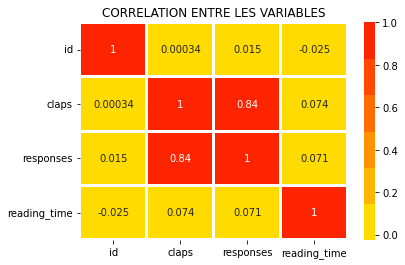

In [26]:
correlation = md.corr()
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("autumn_r"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION ENTRE LES VARIABLES")
plt.show()

In [27]:
arts_per_date= md.date.value_counts().rename_axis('dates').reset_index(name='counts')
arts_per_date

,dates,counts
0,2019-10-21,197
1,2019-05-30,193
2,2019-09-18,186
3,2019-10-23,184
4,2019-10-14,180
5,2019-09-17,178
6,2019-10-28,177
7,2019-12-05,175
8,2019-05-22,173
9,2019-06-27,172


In [28]:
arts_per_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   50 non-null     datetime64[ns]
 1   counts  50 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 928.0 bytes


In [29]:
arts_per_date['month'] = arts_per_date.dates.dt.month_name()
arts_per_date['day_of_week'] = arts_per_date.dates.dt.day_name()
arts_per_date

,dates,counts,month,day_of_week
0,2019-10-21,197,October,Monday
1,2019-05-30,193,May,Thursday
2,2019-09-18,186,September,Wednesday
3,2019-10-23,184,October,Wednesday
4,2019-10-14,180,October,Monday
5,2019-09-17,178,September,Tuesday
6,2019-10-28,177,October,Monday
7,2019-12-05,175,December,Thursday
8,2019-05-22,173,May,Wednesday
9,2019-06-27,172,June,Thursday


In [30]:
organised_date= arts_per_date.pivot_table(index='month', columns='day_of_week', values='counts',  aggfunc='sum', fill_value=0)
organised_date= organised_date[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

In [31]:
organised_date

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
April,175,88,0,65,0,0,56
August,0,0,0,167,0,0,74
December,165,0,0,175,273,0,0
February,115,0,0,0,0,136,0
January,0,0,0,0,0,68,0
July,170,0,0,329,0,107,210
June,0,171,0,172,0,137,0
March,363,0,0,90,0,60,64
May,332,0,173,375,167,0,205


In [32]:
md['month'] =md['date'].dt.month
date_gr =md.groupby('month')['publication'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(date_gr, x= 'month', y='publication', color = 'publication',hover_data=['publication'],
       title="Month wise Publication" )

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [33]:
md["title"]

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6506, dtype: object

In [34]:
md['title']= md['title'].apply(lambda x: x.replace("’", "'").replace(" — ", " - "))
md['title']

0       A Beginner's Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” - How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6506, dtype: object